# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2 
my_eth = 5.3

In [4]:
# Crypto API URLs for bitcoin and ethereum
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# Get bitcoin data using call to btc api url 
btc_response_data = requests.get(btc_url)
# Convert response from api call to json format
btc_response_content_json = btc_response_data.json()
# Reach into json response content and select the price as an integer 
btc_price = int(btc_response_content_json["data"]["1"]["quotes"]["CAD"]["price"])

# Fetch current ETH price
# Get ethereum data using call to eth api url 
eth_response_data = requests.get(eth_url)
# Convert response from api call to json format
eth_response_content_json = eth_response_data.json()
# Reach into json response content and select the price as an integer 
eth_price = int(eth_response_content_json["data"]["1027"]["quotes"]["CAD"]["price"])


# Compute current value of each crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $73623.60
The current value of your 5.3 ETH is $26865.70


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
from datetime import datetime
today = datetime.now().isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
bar = api.get_barset(
    tickers, 
    timeframe, 
    start=today, 
    end=today, 
    limit=1000
).df

# Preview DataFrame
bar

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-12-21 00:00:00-05:00  108.76  108.8700  108.7300  108.830  2173058   
2017-12-22 00:00:00-05:00  108.82  108.8900  108.8100  108.880  2952430   
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408   
2017-12-27 00:00:00-05:00  109.02  109.3250  109.0200  109.285  1863189   
2017-12-28 00:00:00-05:00  109.22  109.2599  109.1435  109.220  2490982   
...                           ...       ...       ...      ...      ...   
2021-12-06 00:00:00-05:00  114.98  115.0391  114.6196  114.660  6364620   
2021-12-07 00:00:00-05:00  114.52  114.7100  114.4500  114.475  5783341   
2021-12-08 00:00:00-05:00  114.37  114.3700  114.0500  114.170  7416826   
2021-12-09 00:00:00-05:00  114.28  114.3860  114.1200  114.200  8223995   
2021-12-10 00:00:00-05:00  114.37  114.5100  114.2200  114.240  6263328   

                              SPY                                        
                             open      high       low   close    volume  
time                                                                     
2017-12-21 00:00:00-05:00  267.73  268.3850  267.3000  267.57  34999954  
2017-12-22 00:00:00-05:00  267.60  267.6350  266.9000  267.48  36604044  
2017-12-26 00:00:00-05:00  267.06  267.3900  266.8850  267.17  24888478  
2017-12-27 00:00:00-05:00  267.36  267.7300  267.0100  267.33  32573906  
2017-12-28 00:00:00-05:00  267.85  267.9200  267.4500  267.86  23583584  
...                           ...       ...       ...     ...       ...  
2021-12-06 00:00:00-05:00  456.14  460.7900  453.5600  458.78  88930961  
2021-12-07 00:00:00-05:00  464.41  468.8800  458.6546  468.24  79124909  
2021-12-08 00:00:00-05:00  468.70  470.0000  466.8300  469.54  62917411  
2021-12-09 00:00:00-05:00  468.15  469.6291  466.1400  466.34  54963509  
2021-12-10 00:00:00-05:00  469.23  470.9000  466.5100  470.72  64958435  

[1000 rows x 10 columns]

In [9]:
# Pick AGG and SPY close prices
latest_close = bar.tail(1)

# Select the close prices for AGG and SPY fron the latest_close dataframe
agg_close_price = latest_close["AGG"]["close"][0]
spy_close_price = latest_close["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.24
Current SPY closing price: $470.72


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $22848.00
The current value of your 50 SPY shares is $23536.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

#investment totals
crypto_total = my_btc_value + my_eth_value
shares_total = my_agg_value + my_spy_value

# Consolidate financial assets data
investment_type = ["crypto ", "shares "]

# Create the savings DataFrame with `tickers` as index
df_savings  = pd.DataFrame(index=[investment_type])
df_savings['amount'] = [crypto_total, shares_total]

# Display savings DataFrame
df_savings

,amount
crypto,100489.3
shares,46384.0


<AxesSubplot:ylabel='amount'>

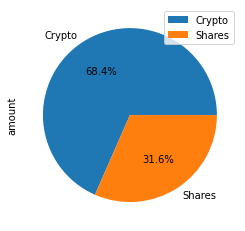

In [12]:
# Set plot labels and plot savings as pie chart
labels = 'Crypto', 'Shares'
df_savings.plot.pie(y='amount',subplots=False, autopct='%1.1f%%',labels=labels)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate Total Savings using the values for total cryptos and total shares in the savings dataframe 
total_savings = df_savings["amount"][0] + df_savings["amount"][1]

# Validate saving health
# Check total savings is more than required emergency funds
if total_savings > emergency_fund:
    print(f"Congratulations you have more than enough money in your investments in case of an emergency")
# Check total savings is equal to the required emergency funds
elif total_savings == emergency_fund:
    print(f"Congratulations you have reached your financial goal of having enough money in case of emergency")
# Check total savings is less than required emergency funds
elif total_savings < emergency_fund:
    print(f"You are ${(round(total_savings-emergency_fund,2)*-1)} away from having enough money in case of emergency") 

Congratulations you have more than enough money in your investments in case of an emergency


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2016-12-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers, 
    timeframe, 
    start=start_date, 
    end=end_date, limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-12-15 00:00:00-05:00  109.42  109.55  109.3150  109.47  2034072.0   
2017-12-18 00:00:00-05:00  109.47  109.47  109.2500  109.31  3090761.0   
2017-12-19 00:00:00-05:00  109.14  109.16  108.8900  109.00  2583809.0   
2017-12-20 00:00:00-05:00  108.75  108.88  108.7059  108.77  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.87  108.7300  108.83  2173058.0   

                              SPY                                       
                             open     high     low   close      volume  
time                                                                    
2017-12-15 00:00:00-05:00     NaN      NaN     NaN     NaN         NaN  
2017-12-18 00:00:00-05:00  268.08  268.600  267.98  268.18  45691370.0  
2017-12-19 00:00:00-05:00  268.48  268.530  267.09  267.22  46990895.0  
2017-12-20 00:00:00-05:00  268.25  268.330  266.69  267.04  42133908.0  
2017-12-21 00:00:00-05:00  267.73  268.385  267.30  267.57  34999954.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40AGG_60SPY_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Print the simulation input data
MC_40AGG_60SPY_dist.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-12-15 00:00:00-05:00  109.42  109.55  109.3150  109.47  2034072.0   
2017-12-18 00:00:00-05:00  109.47  109.47  109.2500  109.31  3090761.0   
2017-12-19 00:00:00-05:00  109.14  109.16  108.8900  109.00  2583809.0   
2017-12-20 00:00:00-05:00  108.75  108.88  108.7059  108.77  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.87  108.7300  108.83  2173058.0   

                                           SPY                           \
                          daily_return    open     high     low   close   
time                                                                      
2017-12-15 00:00:00-05:00          NaN     NaN      NaN     NaN     NaN   
2017-12-18 00:00:00-05:00    -0.001462  268.08  268.600  267.98  268.18   
2017-12-19 00:00:00-05:00    -0.002836  268.48  268.530  267.09  267.22   
2017-12-20 00:00:00-05:00    -0.002110  268.25  268.330  266.69  267.04   
2017-12-21 00:00:00-05:00     0.000552  267.73  268.385  267.30  267.57   

                                                    
                               volume daily_return  
time                                                
2017-12-15 00:00:00-05:00         NaN          NaN  
2017-12-18 00:00:00-05:00  45691370.0          NaN  
2017-12-19 00:00:00-05:00  46990895.0    -0.003580  
2017-12-20 00:00:00-05:00  42133908.0    -0.000674  
2017-12-21 00:00:00-05:00  34999954.0     0.001985

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40AGG_60SPY_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\AdamF\JLWorkspace\Homework\Week5\Unit-5-Homework-Assignment-Financial-Planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003470,1.008494,1.002769,0.998818,1.003061,0.987129,1.003863,1.004028,1.008202,1.003444,...,1.006258,0.996766,1.004684,1.008563,1.003477,0.999567,0.989249,0.997252,1.002241,1.001330
2,1.012330,1.015359,1.010374,1.013311,0.995504,0.995930,0.998245,1.011546,1.007507,1.010222,...,0.994977,0.993971,1.012707,1.014758,0.990204,0.989788,0.994179,0.989730,1.006059,1.011085
3,1.017868,1.018110,1.022880,1.015516,1.002383,0.988648,0.998351,1.004899,1.011229,1.014476,...,0.985542,0.993037,1.006828,1.011954,0.996142,0.983464,0.987783,0.994564,1.002237,1.009542
4,1.013923,1.028070,1.048874,1.025683,1.022741,0.996625,0.988127,1.012132,1.011477,0.997943,...,0.974079,1.004738,1.010988,1.016659,0.991107,0.997596,0.990094,0.991037,0.987605,1.006815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.829223,10.270496,32.830436,20.573917,46.262441,5.638886,8.419477,19.356241,9.828054,14.757339,...,6.991221,31.879552,2.451337,9.873454,41.158483,13.961622,2.696178,26.807456,12.766320,19.888992
7557,7.840328,10.433635,32.631116,20.503693,46.741101,5.632508,8.425916,19.398586,9.761797,14.844599,...,7.087345,31.850839,2.436617,9.866982,41.474699,13.905086,2.679690,27.422504,12.695228,19.850301
7558,7.813739,10.368852,32.687774,20.693717,46.896048,5.703847,8.326235,19.048562,9.835664,14.942958,...,7.033932,32.108763,2.447208,9.821121,41.494915,14.065035,2.722657,27.688053,12.627636,19.968644
7559,7.763593,10.330391,32.420004,20.702966,46.707709,5.695426,8.381759,19.226178,10.008060,14.853357,...,7.003449,32.497832,2.441916,9.862177,41.763950,14.184813,2.746420,27.798942,12.550084,19.875810


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

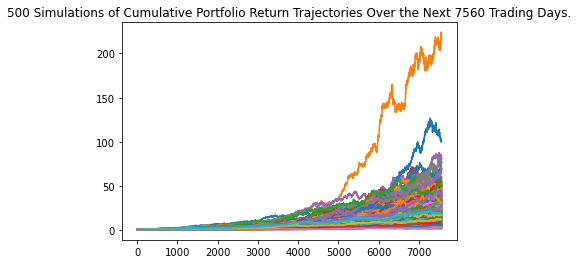

In [19]:
# Plot simulation outcomes
MC_40AGG_60SPY_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

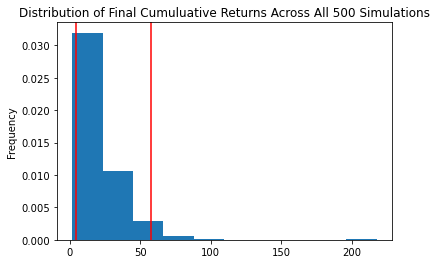

In [20]:
# Plot probability distribution and confidence intervals
MC_40AGG_60SPY_dist.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_40AGG_60SPY_summary = MC_40AGG_60SPY_dist.summarize_cumulative_return()

# Print summary statistics
print(MC_40AGG_60SPY_summary)

count           500.000000
mean             21.173177
std              17.146291
min               1.568158
25%              10.517948
50%              16.648211
75%              27.208095
max             217.503247
95% CI Lower      4.012983
95% CI Upper     57.708532
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment_30yr_20K = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_20k = round(MC_40AGG_60SPY_summary[8]*initial_investment_30yr_20K,2)
ci_upper_20k = round(MC_40AGG_60SPY_summary[9]*initial_investment_30yr_20K,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_30yr_20K} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_20k} and ${ci_upper_20k}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $80259.65 and $1154170.64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment_30yr_30K = int(20000 * 1.5)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_30k = round(MC_40AGG_60SPY_summary[8]*initial_investment_30yr_30K,2)
ci_upper_30k = round(MC_40AGG_60SPY_summary[9]*initial_investment_30yr_30K,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_30yr_30K} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30k} and ${ci_upper_30k}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $120389.48 and $1731255.97


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_40AGG_60SPY_dist_5yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_40AGG_60SPY_dist_5yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\AdamF\JLWorkspace\Homework\Week5\Unit-5-Homework-Assignment-Financial-Planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994109,0.999156,0.994094,1.002132,1.007399,1.009797,1.003544,0.995898,1.020300,1.000480,...,0.997337,1.005886,0.995438,1.000053,1.018526,0.993271,0.989803,0.997809,1.011606,0.987569
2,0.992171,0.990023,0.991701,1.002590,0.995408,1.026428,1.019887,0.991696,1.033803,0.988930,...,0.995710,0.987234,1.011455,0.997919,1.021598,0.978566,0.991791,1.004040,1.003906,0.994407
3,1.004003,0.990117,0.989107,1.010841,1.004915,1.027130,1.017419,0.999748,1.040778,1.004203,...,1.003200,0.993251,1.013501,0.993751,1.018974,0.983007,1.005333,0.996829,1.007424,0.996514
4,1.011952,0.991982,0.991309,1.010656,1.004344,1.023289,1.021899,1.001859,1.045216,0.998131,...,1.015265,0.991678,1.012538,0.987926,1.018784,0.990252,1.007039,1.009234,0.990372,0.991621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.016003,1.213697,1.477001,0.864546,1.636447,1.945457,1.387499,1.614824,1.303380,1.273119,...,1.115781,1.055056,1.099322,1.161483,1.727799,1.040163,2.108161,2.317118,1.031835,2.967395
1257,2.022754,1.205404,1.486529,0.860044,1.637303,1.970212,1.402709,1.614609,1.299093,1.287091,...,1.123994,1.062511,1.105072,1.182671,1.717157,1.031580,2.107455,2.340021,1.032278,3.016680
1258,2.001891,1.215491,1.470599,0.874193,1.621484,1.958247,1.396602,1.630252,1.295510,1.286031,...,1.121339,1.066025,1.103481,1.184536,1.686576,1.034786,2.115373,2.347070,1.030387,2.999478
1259,1.991670,1.224265,1.480049,0.862474,1.604822,1.950314,1.393628,1.647701,1.295234,1.261767,...,1.115893,1.056773,1.111787,1.185701,1.681577,1.036919,2.122677,2.337396,1.030623,2.968964


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

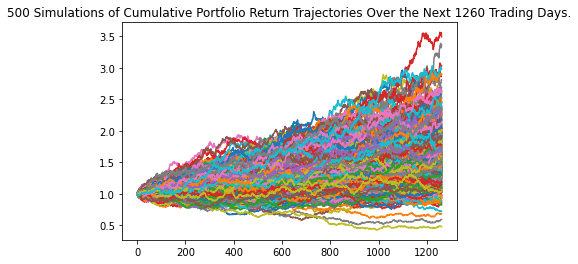

In [26]:
# Plot simulation outcomes
MC_40AGG_60SPY_dist_5yrs.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

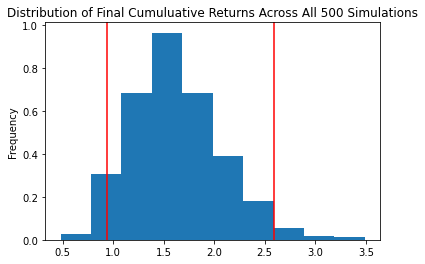

In [27]:
# Plot probability distribution and confidence intervals
MC_40AGG_60SPY_dist_5yrs.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_40AGG_60SPY_summary_5yrs = MC_40AGG_60SPY_dist_5yrs.summarize_cumulative_return()

# Print summary statistics
print(MC_40AGG_60SPY_summary_5yrs)

count           500.000000
mean              1.630669
std               0.442523
min               0.480338
25%               1.321851
50%               1.586621
75%               1.912715
max               3.490421
95% CI Lower      0.935664
95% CI Upper      2.595650
Name: 1260, dtype: float64


In [29]:
# In this option increase the initial investment to 60k
initial_investment_60K = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5yrs = round(MC_40AGG_60SPY_summary_5yrs[8]*initial_investment_60K,2)
ci_upper_5yrs = round(MC_40AGG_60SPY_summary_5yrs[9]*initial_investment_60K,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_60K} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5yrs} and ${ci_upper_5yrs}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56139.82 and $155739.02


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_40AGG_60SPY_dist_10yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_40AGG_60SPY_dist_10yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\AdamF\JLWorkspace\Homework\Week5\Unit-5-Homework-Assignment-Financial-Planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017533,0.988201,0.991510,1.002626,0.994966,0.991628,1.002971,1.004798,0.982299,1.010556,...,0.999437,0.986454,1.001998,1.002081,0.994568,1.012132,1.018970,0.993829,0.994430,0.997180
2,1.017304,0.974915,1.000624,1.010898,0.990311,0.988600,1.008039,1.005140,0.986128,1.014999,...,1.006598,0.993714,1.006606,1.006353,0.993739,1.009731,1.029314,0.986630,0.998573,0.992128
3,1.024538,0.979174,0.986844,1.024573,0.988737,0.991303,1.017629,0.996688,0.981892,1.020539,...,1.005533,0.984813,0.993753,0.999130,0.990243,1.013490,1.038919,0.989408,1.006676,0.992813
4,1.026736,0.961939,0.998259,1.035138,1.006221,0.979746,1.021473,0.999484,0.969709,1.004339,...,0.999377,0.991956,1.000263,1.001537,0.993309,1.021632,1.045059,0.998004,0.993254,0.976715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.566438,1.550422,2.996908,4.383907,2.760375,2.698651,5.323583,1.990439,2.904777,2.625364,...,2.009671,3.492147,4.604488,3.219259,1.320689,3.071742,3.592083,1.491580,3.072856,3.748751
2517,1.580389,1.556449,2.968422,4.353611,2.743307,2.699503,5.371253,1.976210,2.905090,2.604694,...,2.020315,3.468842,4.608154,3.201893,1.312751,3.086638,3.636222,1.470247,3.054816,3.748638
2518,1.571237,1.544839,2.991661,4.335148,2.732186,2.712597,5.452052,1.974678,2.947248,2.583459,...,1.999339,3.429113,4.683569,3.202262,1.322556,3.079061,3.635567,1.453270,3.031867,3.751720
2519,1.562363,1.546836,3.018154,4.336702,2.733311,2.723141,5.429726,1.948224,2.923472,2.596051,...,2.005130,3.426600,4.622215,3.212931,1.348099,3.082978,3.631700,1.443443,3.036998,3.765744


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

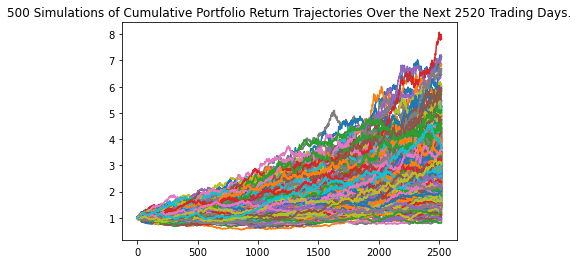

In [32]:
# Plot simulation outcomes
MC_40AGG_60SPY_dist_10yrs.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

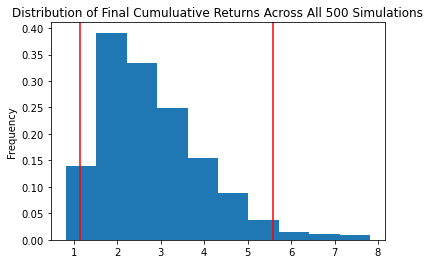

In [33]:
# Plot probability distribution and confidence intervals
MC_40AGG_60SPY_dist_10yrs.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_40AGG_60SPY_summary_10yrs = MC_40AGG_60SPY_dist_10yrs.summarize_cumulative_return()

# Print summary statistics
print(MC_40AGG_60SPY_summary_10yrs)

count           500.000000
mean              2.828211
std               1.175475
min               0.816135
25%               1.971036
50%               2.629347
75%               3.464608
max               7.819139
95% CI Lower      1.150236
95% CI Upper      5.587735
Name: 2520, dtype: float64


In [35]:
# In this option increase the initial investment to 60k
initial_investment_60K = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10yrs = round(MC_40AGG_60SPY_summary_10yrs[8]*initial_investment_60K,2)
ci_upper_10yrs = round(MC_40AGG_60SPY_summary_10yrs[9]*initial_investment_60K,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_60K} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10yrs} and ${ci_upper_10yrs}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $69014.15 and $335264.12


### Analyse the Return Ranges

##### Print the simulation data

In [36]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_30yr_20K} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_20k} and ${ci_upper_20k}")

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_30yr_30K} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30k} and ${ci_upper_30k}")

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_60K} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5yrs} and ${ci_upper_5yrs}")

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_60K} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10yrs} and ${ci_upper_10yrs}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $80259.65 and $1154170.64
There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $120389.48 and $1731255.97
There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56139.82 and $155739.02
There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $69014.15 and $335264.12


### Summarise the Return Ranges

##### Reducing the investment term to 5 years and increasing the initial investment to 60000 shows that the lower confidence interval reduces to almost 50 percent of the 30 year lower ci. The upper confidence level however reduces a massive amount, and is close to 10 percent of the 30 year upper ci

##### Reducing the investment term to 10 years and increasing the initial investment to 60000 shows that the lower confidence interval reduces to almost 80 percent of the 30 year lower ci. The upper confidence level however reduces a massive amount, close to 22 percent of the 30 year upper ci

##### Both the 5 and 10 year options even with an increase of initial investment to 60000 dollars do not come close to providing enough money to fund retirement.

### Five Years Retirement Option 2

#### Lets look another option and see what the figures look like if we use all our savings as calculated in the Savings Health section above as the initial investment, and we invest it with a much more aggressive 10/90 bond to shares split for 5 years


In [37]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_40AGG_60SPY_dist_5yrs_Option_2 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.1,0.9],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [38]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_40AGG_60SPY_dist_5yrs_Option_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\AdamF\JLWorkspace\Homework\Week5\Unit-5-Homework-Assignment-Financial-Planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981466,1.016397,0.980589,0.974201,1.036900,1.002989,1.015551,1.000665,1.017043,1.010559,...,1.005265,1.010233,0.995892,0.990771,0.992961,1.001494,0.988603,1.014234,0.981175,0.999585
2,1.011327,1.015000,0.968856,0.982102,1.028190,1.000124,1.018367,0.986912,1.011497,0.990647,...,0.996365,1.000257,1.013470,0.989136,0.998289,0.979193,0.980873,1.017385,0.984865,1.004372
3,1.009180,1.017533,0.963397,0.982419,1.015118,1.004572,1.015742,0.993606,1.030551,0.979600,...,0.996786,1.004927,1.000116,0.999500,0.962523,0.964414,0.957477,1.030736,0.977194,1.005207
4,1.001115,1.025743,0.967839,0.991330,1.005065,1.003976,1.022725,0.985920,1.018581,0.959432,...,1.011624,1.014479,0.987608,0.989057,0.978725,0.981464,0.958653,1.034419,0.971723,1.006938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.425134,1.711651,1.230117,1.923691,2.344486,1.019952,1.339472,2.845788,2.834210,1.845485,...,0.681122,1.240112,1.885318,2.614242,3.590905,1.271195,1.202810,3.040209,2.220120,2.896271
1257,3.468063,1.724664,1.256646,1.945438,2.322551,1.041761,1.324743,2.873674,2.864001,1.825055,...,0.674210,1.234726,1.900515,2.591013,3.624254,1.268384,1.246223,3.027001,2.205988,2.860746
1258,3.425835,1.721319,1.272872,1.944142,2.336626,1.045409,1.297683,2.817306,2.907442,1.795521,...,0.682582,1.271417,1.884503,2.596754,3.612624,1.299555,1.266195,3.055729,2.231117,2.882743
1259,3.445748,1.728775,1.277665,1.958271,2.363328,1.049994,1.306622,2.760995,2.895092,1.827145,...,0.671126,1.297842,1.863840,2.564596,3.576845,1.296322,1.271157,3.040721,2.268595,2.858183


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

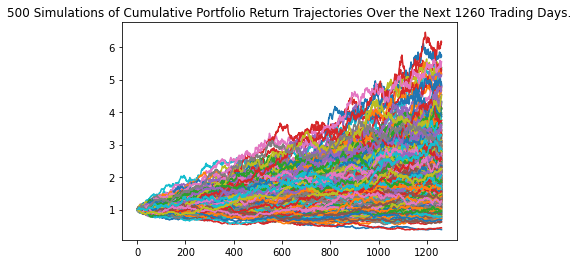

In [39]:
# Plot simulation outcomes
MC_40AGG_60SPY_dist_5yrs_Option_2.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

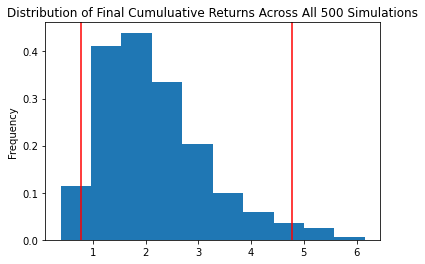

In [40]:
# Plot probability distribution and confidence intervals
MC_40AGG_60SPY_dist_5yrs_Option_2.plot_distribution()

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_40AGG_60SPY_summary_5yrs_Option_2 = MC_40AGG_60SPY_dist_5yrs_Option_2.summarize_cumulative_return()

# Print summary statistics
print(MC_40AGG_60SPY_summary_5yrs_Option_2)

count           500.000000
mean              2.161370
std               0.993763
min               0.383078
25%               1.447340
50%               1.936727
75%               2.669012
max               6.158859
95% CI Lower      0.778233
95% CI Upper      4.767791
Name: 1260, dtype: float64


In [42]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our total savings
ci_lower_5yrs_Option_2 = round(MC_40AGG_60SPY_summary_5yrs_Option_2[8]*total_savings,2)
ci_upper_5yrs_Option_2 = round(MC_40AGG_60SPY_summary_5yrs_Option_2[9]*total_savings,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${total_savings} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5yrs_Option_2} and ${ci_upper_5yrs_Option_2}")

There is a 95% chance that an initial investment of $146873.3 in the portfolio over the next 5 years will end within in the range of $114301.6 and $700261.24


### Ten Years Retirement Option 2

#### Lets look another option and see what the figures look like if we use all our savings as calculated in the Savings Health section above as the initial investment, and we invest it with a much more aggressive 10/90 bond to shares split for 10 years

In [43]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_40AGG_60SPY_dist_10yrs_Option_2 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.1,0.9],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [44]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_40AGG_60SPY_dist_10yrs_Option_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\AdamF\JLWorkspace\Homework\Week5\Unit-5-Homework-Assignment-Financial-Planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.977409,1.013759,1.006365,0.987703,1.005378,1.003049,1.001333,0.989654,0.993392,1.002624,...,1.001585,0.994298,0.985786,0.980050,1.000239,1.003437,1.007354,1.003321,1.004414,0.994351
2,0.987726,0.993967,1.022114,0.968922,0.996864,1.011517,0.999072,1.004878,1.002200,1.012412,...,0.993930,0.991331,0.984895,0.967857,1.002052,0.999493,1.003491,0.992539,1.022135,0.987870
3,0.989303,0.984101,1.027355,0.981840,1.015484,1.034805,1.006135,0.991269,0.996949,0.994569,...,1.003640,1.003227,0.998910,0.961763,0.979365,0.998888,1.006713,1.012412,1.031522,0.994419
4,0.965403,0.988594,1.009708,1.003976,1.032693,1.030355,0.984121,1.008890,0.993837,0.988460,...,1.008423,1.023262,0.997401,0.967797,0.966576,0.995689,1.003131,1.028321,1.055438,1.001789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.150482,7.916123,1.913551,4.989513,5.928873,1.539272,2.738092,8.435164,2.284539,3.003096,...,1.652303,3.052625,9.062692,1.715851,6.253959,1.926010,3.210190,3.425604,7.098318,6.452006
2517,2.110985,7.950412,1.910825,5.060314,5.827460,1.536369,2.746036,8.451299,2.268354,2.994752,...,1.682312,3.091921,8.985997,1.757468,6.209326,1.995623,3.180987,3.373735,7.218466,6.419121
2518,2.142031,8.104897,1.921683,5.002076,5.921482,1.570479,2.818946,8.527510,2.199798,2.956846,...,1.718050,3.089139,9.106623,1.771006,6.065904,1.975113,3.114409,3.346261,7.244373,6.459189
2519,2.135604,8.013470,1.939765,4.970686,6.003827,1.557030,2.773818,8.662297,2.168704,2.979866,...,1.712068,3.122648,9.108588,1.728829,5.969007,1.994717,3.102504,3.358210,7.237038,6.438030


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

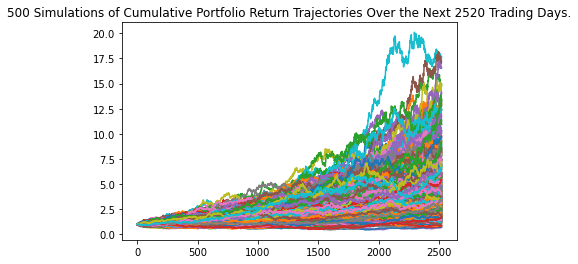

In [45]:
# Plot simulation outcomes
MC_40AGG_60SPY_dist_10yrs_Option_2.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

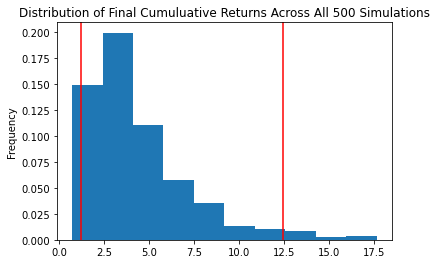

In [46]:
# Plot probability distribution and confidence intervals
MC_40AGG_60SPY_dist_10yrs_Option_2.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_40AGG_60SPY_summary_10yrs_Option_2 = MC_40AGG_60SPY_dist_10yrs_Option_2.summarize_cumulative_return()

# Print summary statistics
print(MC_40AGG_60SPY_summary_10yrs_Option_2)

count           500.000000
mean              4.362187
std               2.821140
min               0.714499
25%               2.393263
50%               3.571558
75%               5.448744
max              17.661795
95% CI Lower      1.220252
95% CI Upper     12.441582
Name: 2520, dtype: float64


In [48]:
# Set initial investment
initial_investment = total_savings

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our total savings
ci_lower_10yrs_Option_2 = round(MC_40AGG_60SPY_summary_10yrs_Option_2[8]*total_savings,2)
ci_upper_10yrs_Option_2 = round(MC_40AGG_60SPY_summary_10yrs_Option_2[9]*total_savings,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${total_savings} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10yrs_Option_2} and ${ci_upper_10yrs_Option_2}")

There is a 95% chance that an initial investment of $146873.3 in the portfolio over the next 10 years will end within in the range of $179222.38 and $1827336.19


### Analyse the Return Ranges for Retirement Option 2


##### Print the simulation data for a 10/90 Portfolio and using Total Savings as the initial investment

In [49]:
# Print results
print(f"There is a 95% chance that an initial investment of ${total_savings} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5yrs_Option_2} and ${ci_upper_5yrs_Option_2}")

# Print results
print(f"There is a 95% chance that an initial investment of ${total_savings} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10yrs_Option_2} and ${ci_upper_10yrs_Option_2}")

There is a 95% chance that an initial investment of $146873.3 in the portfolio over the next 5 years will end within in the range of $114301.6 and $700261.24
There is a 95% chance that an initial investment of $146873.3 in the portfolio over the next 10 years will end within in the range of $179222.38 and $1827336.19


### Summarise the Return Ranges for Retirement Option 2

##### Increasing the initial investment to total savings and selecting a much more aggressive 10/90 portfolio split over 5 years still does not come close to the 30 year upper ci for a 20K initial investment. It can be seen that increasing both the initial investment and also selecting a more aggressive portfolio split yields a value for the ci uppper that is around 50% of the 30 year figure. If this option was selected it is simulated that you would retire on signigicantly less compared to the 40/60 split portfolio with a 20k initial investment over 30 years.

##### Increasing the initial investment to total savings and selecting a much more aggressive 10/90 portfolio split over 10 years exceeds the 30 year lower and upper ci for a 20K initial investment. It can be seen that increasing both the initial investment amount to total savings and also selecting a more aggressive portfolio split yields a value for the ci uppper that is around 150% of the 30 year figure and a ci lower that is around 200% of the 30 year figure. If this option was selected it is simulated that you would retire on signigicantly more compared to the 40/60 split portfolio with a 20k initial investment over 30 years.
